In [1]:
!pip install opencv-python numpy matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\ercil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import os

In [3]:
FOLDER_IMG = 'img/'
IMG = "road.jpg"
path_img = os.path.join(FOLDER_IMG, IMG)
print(path_img)

img/road.jpg


`imread`  es la operación que permite leer una imagen desde un archivo y cargarla en una matriz de píxeles en memoria. Esta matriz puede ser manipulada y procesada utilizando diversas funciones de OpenCV.

In [4]:
img = cv2.imread(path_img)
print(type(img))
print(img.shape)  # alto, ancho, canales

<class 'numpy.ndarray'>
(735, 1100, 3)


Esta matriz es una representación digital de la imagen, donde cada elemento de la matriz corresponde a un píxel de la imagen. Los valores en la matriz representan la intensidad de los colores en cada píxel, generalmente en formato BGR (azul, verde, rojo) para imágenes en color.

El siguente código muestra cómo usar `imread` para leer una imagen desde un archivo y luego mostrarla en una ventana utilizando OpenCV:

```img = cv2.imread(path_img)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

Aqui `path_img` es la ruta al archivo de imagen que deseas leer. La función `cv2.imshow` se utiliza para mostrar la imagen en una ventana, y `cv2.waitKey(0)` espera a que se presione una tecla antes de cerrar la ventana con `cv2.destroyAllWindows()`. El 0 indica que la espera es indefinida hasta que se presione una tecla.

In [5]:
img = cv2.imread(path_img)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img = cv2.imread(path_img)
(B, G, R) = img[100, 100]

print("R = {}, G = {}, B = {}".format(R, G, B))

B = img[100, 100, 0]
print("B = {}".format(B))

R = 239, G = 200, B = 157
B = 157


La region de interés (ROI, por sus siglas en inglés) es una parte específica de una imagen que se selecciona para un análisis o procesamiento más detallado. En OpenCV, puedes definir y manipular regiones de interés utilizando técnicas de indexación de matrices.

In [7]:
img = cv2.imread(path_img)
print(img.shape)
roi = img[350:430, 441:500]
cv2.imshow("ROI", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

(735, 1100, 3)


Se puede redimensionar una imagen utilizando la función `cv2.resize()`, que permite cambiar las dimensiones de una imagen a un tamaño específico. Esto es útil cuando necesitas ajustar el tamaño de una imagen para que se adapte a ciertos requisitos, como la entrada de un modelo de aprendizaje automático o para mejorar la visualización.

In [8]:
dim = 500
resize = cv2.resize(img, (dim, dim))
cv2.imshow("Resize", resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

En opencv se puede dibujar sobre una imagen utilizando diversas funciones de dibujo proporcionadas por la biblioteca. Estas funciones permiten agregar formas geométricas, texto y otros elementos gráficos a una imagen existente. Algunas de las funciones de dibujo más comunes en OpenCV incluyen:
- `cv2.line()`: Dibuja una línea entre dos puntos especificados.
- `cv2.rectangle()`: Dibuja un rectángulo definido por dos esquinas opuestas.
- `cv2.circle()`: Dibuja un círculo con un centro y un radio especificados.
- `cv2.ellipse()`: Dibuja una elipse con un centro, ejes y ángulo especificados.
- `cv2.putText()`: Agrega texto a una imagen en una posición específica con una fuente y tamaño determinados.

El más sencillo es dibujar un rectángulo sobre una imagen. El siguiente código muestra cómo hacerlo:

In [9]:
img = cv2.imread(path_img)
img_copy = img.copy()

esquina_sup_izq = (430, 360)
esquina_inf_der = (500, 450)
color = (0, 255, 0) # verde
grosor = 2

rect = cv2.rectangle(
    img_copy, 
    esquina_sup_izq, # esquina superior izquierda
    esquina_inf_der, # esquina inferior derecha
    color, # color (B, G, R)
    grosor # grosor del rectángulo
)
cv2.imshow("Rectangle", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# recorta la imagen para que solo se vea el objeto dentro del rectángulo
img = cv2.imread(path_img)
img_copy = img.copy()
crop = img_copy[360:450, 430:500]
cv2.imshow("Recorte", crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

Guardar la imagen es muy sencillo con la función `cv2.imwrite()`, que permite guardar una imagen en un archivo en el disco. Esta función toma dos argumentos principales: la ruta del archivo donde se desea guardar la imagen y la matriz de píxeles de la imagen que se va a guardar.

In [11]:
# Guardar la imagen
path_to_save = os.path.join(FOLDER_IMG, "road_car_detected.png")
cv2.imwrite(path_to_save, crop)

True

In [12]:
img = cv2.imread(path_img)
img_copy = img.copy()

text = cv2.putText(
    img_copy, # imagen donde se escribe
    'OpenCV Demo', # texto
    (100, 500), # posición (x, y) de la esquina inferior izquierda del texto
    cv2.FONT_HERSHEY_SIMPLEX, # fuente
    4, # escala de la fuente
    (255, 0, 0), # color (B, G, R)
    2 # grosor del texto
)
cv2.imshow("Text", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Cambiar de color

En una imagen digital, los colores se representan a través de la tercera dimensión de la matriz de píxeles, conocida en Visión por Computador como espacio de color (Color Space). Un espacio de color define cómo se codifican y organizan los colores, y existen muchos tipos distintos de representaciones.

Los más comunes son:

RGB: cada píxel se describe mediante tres valores (Rojo, Verde y Azul), que combinados generan un amplio rango de colores.

Escala de grises: en lugar de tres valores, cada píxel se representa con un único valor que indica la intensidad de la luz. Este valor suele ir de 0 (negro) a 255 (blanco) en imágenes de 8 bits, aunque también puede simplificarse a un valor binario (0 o 1), produciendo una imagen en blanco y negro puro.

Esto es util para muchos algoritmos que usan la escala de grises para poder tener mejor precisión

In [13]:
# Reading an image in default mode
src = cv2.imread(path_img)
print(src.shape)

# Window name in which image is displayed
window_name = 'Escala de grises'

# Using cv2.cvtColor() method
# Using cv2.COLOR_BGR2GRAY color space
# conversion code
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
print(image.shape)

# Displaying the image
cv2.imshow(window_name, image)

cv2.waitKey(0)
cv2.destroyAllWindows()

(735, 1100, 3)
(735, 1100)


## Aritmetica

In [14]:
star = os.path.join(FOLDER_IMG, "star.jpg")
dot  = os.path.join(FOLDER_IMG, "dot.jpg")

In [15]:
import matplotlib.pyplot as plt # Matplotlib es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.

(168, 300, 3)


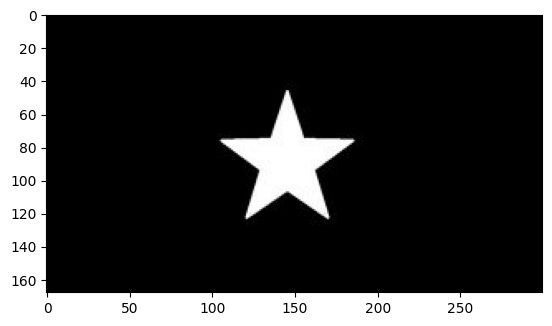

In [16]:
image_start = cv2.imread(star)
plt.imshow(image_start)
print(image_start.shape)

(168, 300, 3)


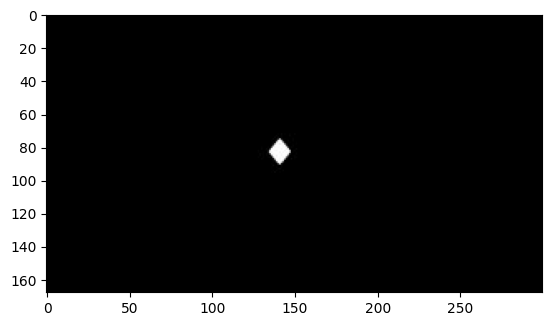

In [17]:
image2_dot = cv2.imread(dot)
plt.imshow(image2_dot)
print(image2_dot.shape)

In [18]:
img_sub = cv2.subtract(image_start, image2_dot)

cv2.imshow('Weighted Image', img_sub)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
image_start = cv2.imread(star)
print(image_start.shape)
image2_dot = cv2.imread(dot)
print(image2_dot.shape)

img_sum = cv2.add(image_start, image2_dot)

cv2.imshow('Weighted Image', img_sum)

cv2.waitKey(0)
cv2.destroyAllWindows()

(168, 300, 3)
(168, 300, 3)


#### Suma ponderada de imágenes con OpenCV

La función `cv2.addWeighted` permite combinar dos imágenes píxel a píxel con una **suma ponderada**. La ecuación general es:

$$
dst(x,y) = \alpha \cdot src1(x,y) + \beta \cdot src2(x,y) + \gamma
$$

* **src1(x,y)**: valor del píxel en la primera imagen.
* **src2(x,y)**: valor del píxel en la segunda imagen.
* **α (alpha)**: peso de la primera imagen.
* **β (beta)**: peso de la segunda imagen.
* **γ (gamma)**: escalar que se suma a cada píxel (controla brillo).
* **dst(x,y)**: píxel resultante en la nueva imagen.

Esta es la formula matricial

$$
Dst = \alpha \cdot Img_1 + \beta \cdot Img_2 + \gamma
$$

Para la resta no existe una función de ponderación pero podemos idear algo



In [20]:
image_start = cv2.imread(star)
print(image_start.shape)
image2_dot = cv2.imread(dot)
print(image2_dot.shape)

# cv2.addWeighted se aplica sobre las imágenes de entrada con los parámetros dados
weightedSum = cv2.addWeighted(
    image_start,  # primera imagen
    0.5,          # peso de la primera imagen
    image2_dot,   # segunda imagen
    1,            # peso de la segunda imagen
    0             # escalar añadido a cada suma (brillo)
)

# ventana que muestra la imagen de salida
# con la suma ponderada
cv2.imshow('Imagen Ponderada', weightedSum)

cv2.waitKey(0)
cv2.destroyAllWindows()


(168, 300, 3)
(168, 300, 3)


## Detectar bordes

El algoritmo de **Canny** es uno de los más usados para detectar bordes en imágenes.
La función en OpenCV es:

```python
edges = cv2.Canny(img, umbral1, umbral2)
```

* **img** → imagen de entrada.
* **umbral1 (100)** → umbral inferior.
* **umbral2 (200)** → umbral superior.
* **edges** → imagen binaria resultante, donde los bordes aparecen en blanco (255) y el resto en negro (0).

El detector de Canny busca zonas donde la **intensidad cambia bruscamente**, lo que corresponde a contornos u objetos en la imagen.

En este ejemplo:

1. Se lee la imagen con `cv2.imread(path_img)`.
2. Se aplica `cv2.Canny(img, 100, 200)` para detectar bordes.
3. Se muestra el resultado en una ventana (`cv2.imshow`).


In [21]:
img = cv2.imread(path_img)

edges = cv2.Canny(img, 100, 200)

cv2.imshow('Bordes', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Capturar tu webcam

Una cosa interesante que se puede hacer con OpenCV es capturar video en tiempo real desde la webcam. Esto se puede lograr utilizando la clase `cv2.VideoCapture`. A continuación se muestra un ejemplo básico de cómo capturar video desde la webcam y mostrarlo en una ventana:

```python
import cv2

# Iniciar la captura de video desde la webcam (0 es el índice de la webcam)
cap = cv2.VideoCapture(0)

while True:
    # Leer un fotograma de la webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Mostrar el fotograma en una ventana
    cv2.imshow("Webcam", frame)

    # Salir si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la captura y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()
```

In [22]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        raise Exception("No se puede abrir la cámara")

    # Our operations on the frame come here
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #frame = cv2.Canny(frame, 100, 200)
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

## Ejercicios

1. ¿Qué pasaría si conviertes una imagen a escala de grises antes de aplicar el algoritmo de Canny?

2. Busca dos fotos en internet, súmalas y réstalas. ¿Qué diferencias observas en los resultados? ¿Que pasaría si restas la misma imagen?

3. Investiga otros espacios de color en OpenCV y prueba a transformar una misma imagen. ¿Qué cambios notas en la representación de los colores?
    - https://www.geeksforgeeks.org/python/color-spaces-in-opencv-python/

4. En la imagen de la carretera, localiza los dos camiones y extrae un ROI (Región de Interés) para cada uno. ¿Qué utilidad puede tener trabajar con ROIs en visión por computador?

5. Usando la wedcam, captura video en tiempo real e intenta restar una imagen con la siguiente. ¿Qué ocurre si te mueves en la escena?